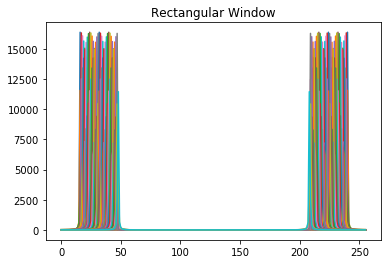

In [10]:
#Question 1: As you decrease the width of both the rectangular and the Hamming window, accroding to Gibbs, you will see that the 
#side lobes will increase in height to accomodate the shrinkage. This is beacuse you need a smaller main lobe width
#for increasing the frequency resolution. Zero-padding increases our frequency resolution and gives a larger main lobe width.
# Looking at the DFT and the DTFT, the DFT provides us with a sampled version of the DTFT which allows the computer to work with it.
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline      

N = 256;                 # length of test signals
num_freqs = 100;         # number of frequencies to test

# Generate vector of frequencies to test
omega = np.pi/8 + np.linspace(0,num_freqs-1,num_freqs)/num_freqs*np.pi/4;

S = np.zeros([N,num_freqs]);                        # matrix to hold FFT results

for i in range(0,len(omega)):                       # loop through freq. vector
    s = np.sin(omega[i]*np.linspace(0,N-1,N));      # generate test sine wave
    win = signal.boxcar(N);                         # use rectangular window
    s = s*win;                                      # multiply input by window
    S[:,i] = np.square(np.abs(np.fft.fft(s)));      # generate magnitude of FFT
                                                    # and store as a column of S
plt.title ("Rectangular Window")
plt.plot(S);

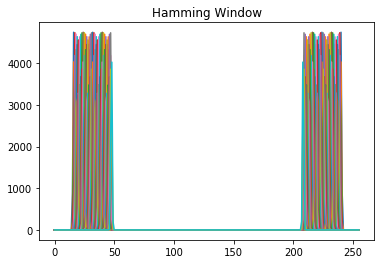

In [9]:
S = np.zeros([N,num_freqs]);                        # matrix to hold FFT results

for i in range(0,len(omega)):                       # loop through freq. vector
    s = np.sin(omega[i]*np.linspace(0,N-1,N));      # generate test sine wave
    win = signal.hamming(N);                         # use rectangular window
    s = s*win;                                      # multiply input by window
    S[:,i] = np.square(np.abs(np.fft.fft(s)));      # generate magnitude of FFT
                                                    # and store as a column of S
plt.title ("Hamming Window")
plt.plot(S);

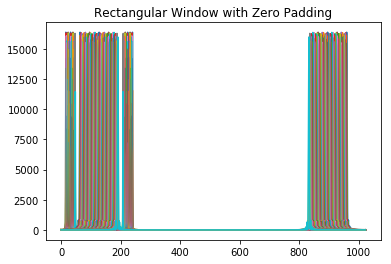

In [7]:
S = np.zeros([N,num_freqs]);                        # matrix to hold FFT results

for i in range(0,len(omega)):                       # loop through freq. vector
    s = np.sin(omega[i]*np.linspace(0,N-1,N));      # generate test sine wave
    win = signal.boxcar(N);                         # use rectangular window
    s = s*win;                                      # multiply input by window
    S[:,i] = np.square(np.abs(np.fft.fft(s)));      # generate magnitude of FFT
                                                    # and store as a column of S

plt.plot(S);

S = np.zeros([4*N,num_freqs]);                        # matrix to hold FFT results

for i in range(0,len(omega)):                       # loop through freq. vector
    s = np.sin(omega[i]*np.linspace(0,N-1,N));      # generate test sine wave
    win = signal.boxcar(N);                         # use rectangular window
    s = s*win;                                      # multiply input by window
    S[:,i] = np.square(np.abs(np.fft.fft(s,4*N)));      # generate magnitude of FFT
                                                    # and store as a column of S
plt.title ("Rectangular Window with Zero Padding")
plt.plot(S);

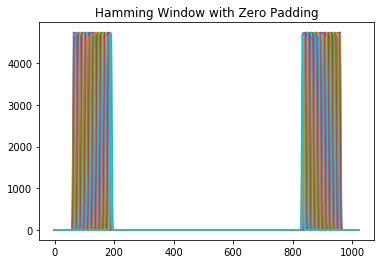

In [8]:
S = np.zeros([4*N,num_freqs]);                        # matrix to hold FFT results

for i in range(0,len(omega)):                       # loop through freq. vector
    s = np.sin(omega[i]*np.linspace(0,N-1,N));      # generate test sine wave
    win = signal.hamming(N);                         # use rectangular window
    s = s*win;                                      # multiply input by window
    S[:,i] = np.square(np.abs(np.fft.fft(s,4*N)));      # generate magnitude of FFT
                                                    # and store as a column of S
plt.title ("Hamming Window with Zero Padding")
plt.plot(S);


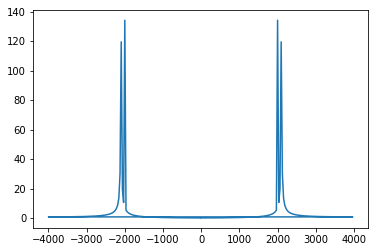

In [21]:
fs = 8000
T = 1/8000
N = 256
duration = 1     # 1 sec
t = np.linspace(0,(N-1)*T,N)
Initial = np.sin(2*np.pi*2000*t)+np.sin(2*np.pi*2100*t)
Output = np.fft.fft(Initial)
b = np.fft.fftfreq(N,T)
plt.plot(b,abs(Output))

In [23]:
#Question 2: After changing the second sampling frequency around many time, at around 2035-2040 the signals become no longer
#distinguishable and will therefore experience aliasing. Zero padding will always result in better resolution of signals
#so both the Hamming Window and the Rectangular Window which are zero padded will have better resolution. Overall, the Rectangular
# window with zero padding seems to give the best resolution. 


NameError: name 'mlab' is not defined

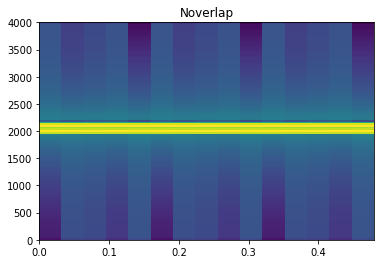

In [26]:
T = 1/8000

time = np.linspace(0,N/8000,N)

plt.specgram(Initial, noverlap = 0, window= signal.hamming(N), Fs = 8000)
plt.title("Noverlap")
plt.show()

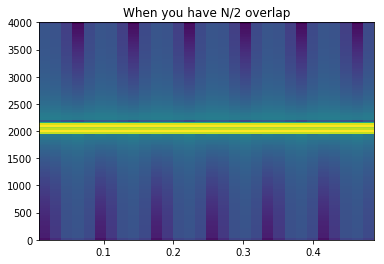

In [21]:
T = 1/8000
N = 256
time = np.linspace(0,N/8000,N)
Initial = np.sin(2*np.pi*2000*t)+np.sin(2*np.pi*2100*t)

plt.specgram(Initial, noverlap = N/2, window= signal.hamming(N), Fs = 8000)
plt.title("When you have N/2 overlap")
plt.show()

In [6]:
import matplotlib.pyplot as plt
plt.specgram(response, noverlap = int(N/2), Fs = 8000)
plt.show
plt.Title("Overlap of N/2")

NameError: name 'response' is not defined

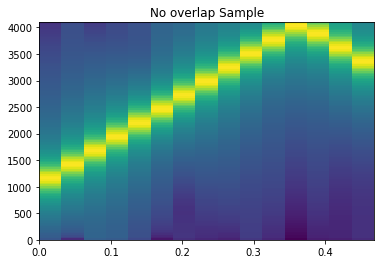

In [14]:
import numpy as np
from IPython.display import Audio
from scipy import signal

t = np.linspace(0,0.5,4001)
s = signal.chirp(t,1000,0.5,5000);    # Frequency-sweep signal

Audio(s,rate=8192)    # Default rate is 8192Hz
plt.specgram(s,Fs = 8192,noverlap = 0)
plt.title("No overlap Sample")
plt.show()

In [9]:
import numpy as np
from IPython.display import Audio
from scipy import signal
import matplotlib.pyplot as plt

t = np.linspace(0,0.5,4001)
s = signal.chirp(t,1000,0.5,5000);    # Frequency-sweep signal

Audio(s,rate=8192)    # Default rate is 8192Hz
plt.title("overlap of N/2")
plt.specgram(s,Fs = 8192,noverlap = 256/2)

(array([[  1.67721707e-14,   8.79689299e-19,   8.73191593e-17, ...,
           5.89853632e-17,   8.35541083e-17,   2.73187766e-17],
        [  3.64055365e-14,   1.24215627e-15,   1.19393367e-15, ...,
           1.17678968e-16,   1.67161353e-16,   5.61555509e-17],
        [  4.52877258e-14,   5.06838949e-15,   4.31037378e-15, ...,
           1.16804723e-16,   1.67322751e-16,   6.07138397e-17],
        ..., 
        [  2.81218307e-16,   3.98985491e-16,   6.44244291e-15, ...,
           2.76092598e-11,   2.64790370e-11,   9.24458189e-12],
        [  2.56294899e-16,   3.57751839e-16,   6.38199470e-15, ...,
           6.91399824e-12,   2.33300788e-11,   8.70482686e-12],
        [  1.24002640e-16,   1.72023081e-16,   3.18095761e-15, ...,
           3.83747649e-13,   1.11713141e-11,   4.26595717e-12]]),
 array([    0.,    32.,    64.,    96.,   128.,   160.,   192.,   224.,
          256.,   288.,   320.,   352.,   384.,   416.,   448.,   480.,
          512.,   544.,   576.,   608.,   640., 

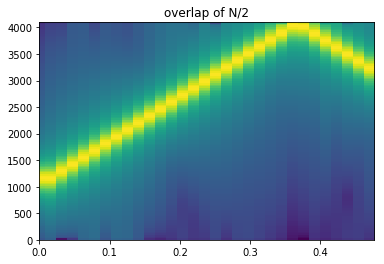

In [12]:
import numpy as np
from IPython.display import Audio
from scipy import signal
import matplotlib.pyplot as plt

t = np.linspace(0,0.5,4001)
s = signal.chirp(t,1000,0.5,5000);    # Frequency-sweep signal

Audio(s,rate=8192)    # Default rate is 8192Hz
plt.title("overlap of N/2")
plt.specgram(s,Fs = 8192,noverlap = 256/2)
plt.show()

In [ ]:
#Question3: At around the 0.4 mark the function hits the peak, and then begins to descend. The two functions seem to overlap more 
#and interfere when you decrease the noverlap.  At N/2 overlap, you can see the functions seperate themselves. On the signal sweep
# you can see more small rectangular samples being taken as the function travels, makes it more accurate. 